In [1]:
import warnings
warnings.filterwarnings(action='ignore')
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC

In [2]:
#step1.selenium 패키지와 time 모듈 import
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [3]:
# 크롬 드라이버로 원하는 url 접속
# 1. 크롬 브라우저 실행
driver = webdriver.Chrome('/Users/hi/Desktop/python_project/chromedriver.exe')

In [22]:
# 2. 특정 페이지로 연결
title_list = []
price_list = []
img_list = []
for i in range(1, 25):
    print('---------------', i , '-------------')
    url = 'https://www2.hm.com/ko_kr/ladies/shop-by-product/dresses.html?sort=stock&image-size=small&image=model&offset=0&page-size=' + str(36*i)
    driver.get(url) # http 요청을 보내라! <----- http 응답을 보낼 것임!
    time.sleep(2)
    
    # 상품명 크롤링
    prod_title = driver.find_elements_by_css_selector('div.item-details > h3 > a')
    for title in prod_title:
        title_list.append(title.text)
    
    # 상품 가격 크롤링
    prod_price = driver.find_elements_by_css_selector('div.item-details > strong > span')
    for price in prod_price:
        price_list.append(price.text)
    
    # 상품 이미지 크롤링
    prod_img = driver.find_elements_by_css_selector('div.image-container > a > img')
    for img in prod_img:
        img_list.append(img.get_attribute('data-altimage'))
    print(len(img_list), len(price_list), len(title_list)) # 잘 넣어지고 있는지 확인
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)") # 스크롤 끝까지 내리기
# 리스트 총 개수 확인
print('상품명:', len(title_list))
print('상품 가격:', len(price_list))
print('상품 이미지:', len(img_list))

--------------- 1 -------------
36 36 36
--------------- 2 -------------
108 108 108
--------------- 3 -------------
216 216 216
--------------- 4 -------------
360 360 360
--------------- 5 -------------
540 540 540
--------------- 6 -------------
756 756 756
--------------- 7 -------------
1008 1008 1008
--------------- 8 -------------
1296 1296 1296
--------------- 9 -------------
1620 1620 1620
--------------- 10 -------------
1980 1980 1980
--------------- 11 -------------
2376 2376 2376
--------------- 12 -------------
2808 2808 2808
--------------- 13 -------------
3276 3276 3276
--------------- 14 -------------
3780 3780 3780
--------------- 15 -------------
4320 4320 4320
--------------- 16 -------------
4896 4896 4896
--------------- 17 -------------
5508 5508 5508
--------------- 18 -------------
6156 6156 6156
--------------- 19 -------------
6840 6840 6840
--------------- 20 -------------
7560 7560 7560
--------------- 21 -------------
8316 8316 8316
--------------- 22 ---

In [9]:
#page-content > div > div:nth-child(3) > ul > li:nth-child(35) > article > div.image-container > a > img
#page-content > div > div:nth-child(3) > ul > li:nth-child(31) > article > div.item-details > h3 > a
#page-content > div > div:nth-child(3) > ul > li:nth-child(31) > article > div.item-details > strong > span

In [10]:
import pandas as pd

In [27]:
# 데이터프레임으로 보기
hm_prod = pd.DataFrame({'상품명' : title_list,
                       '상품 가격' : price_list,
                       '상품 이미지' : img_list
                       })
hm_prod

,상품명,상품 가격,상품 이미지
0,컷아웃 재킷 드레스,"₩49,900",//lp2.hm.com/hmgoepprod?set=source[/81/86/8186...
1,피티드 드레스,"₩29,900",//lp2.hm.com/hmgoepprod?set=source[/5c/d8/5cd8...
2,코튼 셔츠 드레스,"₩39,900",//lp2.hm.com/hmgoepprod?set=source[/f1/d9/f1d9...
3,리넨 블렌드 드레스,"₩39,900",//lp2.hm.com/hmgoepprod?set=source[/52/60/5260...
4,레이스 디테일 슬립 드레스,"₩99,900",//lp2.hm.com/hmgoepprod?set=source[/18/31/1831...
...,...,...,...
10790,칼라 디테일 저지 드레스,"₩29,900",//lp2.hm.com/hmgoepprod?set=source[/35/54/3554...
10791,칼라 디테일 저지 드레스,"₩29,900",//lp2.hm.com/hmgoepprod?set=source[/eb/e5/ebe5...
10792,칼라 디테일 저지 드레스,"₩29,900",//lp2.hm.com/hmgoepprod?set=source[/e6/f4/e6f4...
10793,타이 디테일 데님 드레스,"₩39,900",//lp2.hm.com/hmgoepprod?set=source[/27/4d/274d...


In [29]:
hm_prod.to_csv('H&M_Dress.csv')

In [43]:
hm_prod['img'][1]

'//lp2.hm.com/hmgoepprod?set=source[/5c/d8/5cd86d614e78a7d1174af87b5c359aeb8746add4.jpg],origin[dam],category[],type[DESCRIPTIVESTILLLIFE],res[m],hmver[2]&call=url[file:/product/style]'

In [ ]:
# 이미지 저장 폴더 설정

In [24]:
path_folder = './h&m_img/' # path_folder = './': 현재 경로(폴더)
import os
if not os.path.isdir(path_folder):
    os.mkdir(path_folder)

In [16]:
# 이미지 저장

In [25]:
from urllib.request import urlretrieve

In [26]:
i = 0
for img in img_list:
    i += 1 # i = i + 1
    urlretrieve('https:'+ img, path_folder + str(i) + '.jpg')

In [ ]:
# 이미지가 잘 들어갔는지 확인

In [19]:
from IPython.display import Image

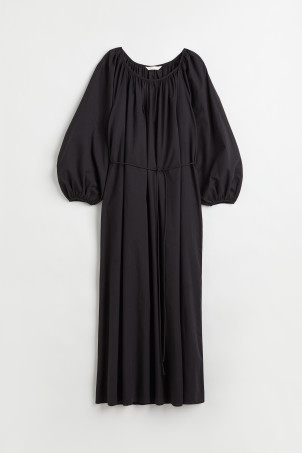

In [20]:
Image('./h&m_img/6.jpg')